<a href="https://colab.research.google.com/github/minnjeee/SWcamp/blob/main/12_%EB%94%A5%EB%9F%AC%EB%8B%9D/ex06)_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%82%AC%EB%9E%8C%EC%96%BC%EA%B5%B4_%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 목표
- 호준, 지현 얼굴을 분류하는 이진 분류 신경망 모델을 만들어보자!

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# PIL : Python Imaging Library (이미지 처리 라이브러리)
from PIL import Image

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/SW캠프 데이터 비즈니스 과정

/content/drive/MyDrive/Colab Notebooks/SW캠프 데이터 비즈니스 과정


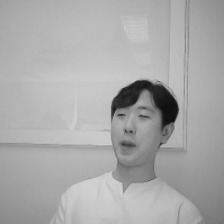

In [ ]:
# 이미지를 불러와서 흑백으로 변
img = Image.open('data/Class 1-samples/0.jpg').convert('L')
# .convert('L') : 흑백으로 변환 (L, Luminous)
# convert('RGB') : 컬러
img

In [ ]:
# 불러온 이미지 데이터를 numpy배열로 변환
# 기계가 인식할 수 있도록 이미지를 수치 데이터로 변환시키는 과정
# 가로(행), 세로(열) 픽셀수로 변경됨
# 학습용 데이터들은 사전에 다 수치데이터로 변환되어져 있던 상태

img_array = np.array(img)

In [ ]:
img_array.shape

(224, 224)

In [ ]:
img_array

array([[159, 159, 160, ..., 139, 139, 138],
       [159, 160, 160, ..., 141, 139, 138],
       [159, 160, 160, ..., 142, 140, 139],
       ...,
       [138, 137, 137, ..., 119, 118, 118],
       [137, 136, 136, ..., 118, 118, 118],
       [136, 135, 135, ..., 118, 118, 119]], dtype=uint8)

### 호준, 지현 각각 200장씩의 데이터를 전부 수치데이터로 변환시켜보자!

In [ ]:
# 반복문 실행 시, 어느정도 실행되고 있는지 %로 알려주는 함
from tqdm import tqdm

In [ ]:
# 데이터셋 구성하기
class1_list = [] # 200장의 호준 데이터가 저장될 자리
class2_list = [] # 200장의 지현 데이터가 저장될 자리

for i in tqdm(range(0, 200, 1)) :
  # 1. 호준 데이터 작업
  # 경로와 파일명에 맞게 이미지를 가져와서 흑백으로 변환 후 img1 변수에 담아주기
  img1 = Image.open('data/Class 1-samples/'+ str(i) +'.jpg').convert('L')
  # 이미지 데이터가 저장된 img1을 numpy배열로 변환
  img_array1 = np.array(img1)
  # 변환된 배열 데이터를 빈 리스트에 하나씩 추가해주기
  class1_list.append(img_array1)

  # 2. 지현 데이터 작업
  img2 = Image.open('data/Class 2-samples/'+ str(i) +'.jpg').convert('L')
  img_array2 = np.array(img2)
  class2_list.append(img_array2)

100%|██████████| 200/200 [03:53<00:00,  1.17s/it]


In [ ]:
# 리스트를 기계학습에 바로 사용할 수 없기 때문에 numpy 배열로 변환시켜주기
# 이미지 하나하나도 배열로, 이를 담고있는 리스트 자체도 배열로 변환시키기!
class1_array = np.array(class1_list)
class2_array = np.array(class2_list)

In [ ]:
class1_array.shape, class2_array.shape

((200, 224, 224), (200, 224, 224))

In [ ]:
# 두 개의 배열 합치기 (문제 데이터 생성)
data = np.concatenate([class1_array, class2_array])

In [ ]:
data.shape # 호준 데이터 200개 + 지현 데이터 200개 순서대로 담겨져 있음

(400, 224, 224)

In [ ]:
# 정답 데이터 만들기 (문제와 정답의 순서를 일치시켜줘야함)
# 0 : 호준 데이터 정답 , 1 : 지현 데이터 정답
target = np.array([0]*200 + [1]*200)
target.shape

(400,)

In [ ]:
# 학습, 평가 데이터로 분리
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=11)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 224, 224), (80, 224, 224), (320,), (80,))

## 신경망 모델링 ~!

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(224,224)))
model.add(Dense(1000, activation='relu')) # relu함수 : 최근 사용하는 일반화함수
model.add(Dense(800, activation='relu'))
model.add(Dense(600, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 50176)             0         
                                                                 
 dense_80 (Dense)            (None, 1000)              50177000  
                                                                 
 dense_81 (Dense)            (None, 800)               800800    
                                                                 
 dense_82 (Dense)            (None, 600)               480600    
                                                                 
 dense_83 (Dense)            (None, 400)               240400    
                                                                 
 dense_84 (Dense)            (None, 300)               120300    
                                                                 
 dense_85 (Dense)            (None, 100)             

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['acc'])

In [ ]:
h = model.fit(X_train, y_train, epochs=300, batch_size=128,
              validation_split=0.2)
# validation_split : 신경망 학습 시 자동으로 train데이터에서 val데이터를 분리시켜주는 명령

Epoch 1/300
2/2 [==============================] - 4s 332ms/step - loss: 5152.1602 - acc: 0.4883 - val_loss: 1238.6666 - val_acc: 0.4531
Epoch 2/300
2/2 [==============================] - 0s 71ms/step - loss: 3562.6216 - acc: 0.4805 - val_loss: 981.8553 - val_acc: 0.5469
Epoch 3/300
2/2 [==============================] - 0s 56ms/step - loss: 3029.6528 - acc: 0.4961 - val_loss: 3156.5884 - val_acc: 0.4531
Epoch 4/300
2/2 [==============================] - 0s 56ms/step - loss: 1976.6117 - acc: 0.5352 - val_loss: 358.9959 - val_acc: 0.5469
Epoch 5/300
2/2 [==============================] - 0s 71ms/step - loss: 2274.0640 - acc: 0.4492 - val_loss: 3363.4966 - val_acc: 0.4531
Epoch 6/300
2/2 [==============================] - 0s 56ms/step - loss: 1974.7078 - acc: 0.5039 - val_loss: 1626.6008 - val_acc: 0.5469
Epoch 7/300
2/2 [==============================] - 0s 61ms/step - loss: 1927.6688 - acc: 0.4961 - val_loss: 846.5067 - val_acc: 0.5469
Epoch 8/300
2/2 [==============================] -

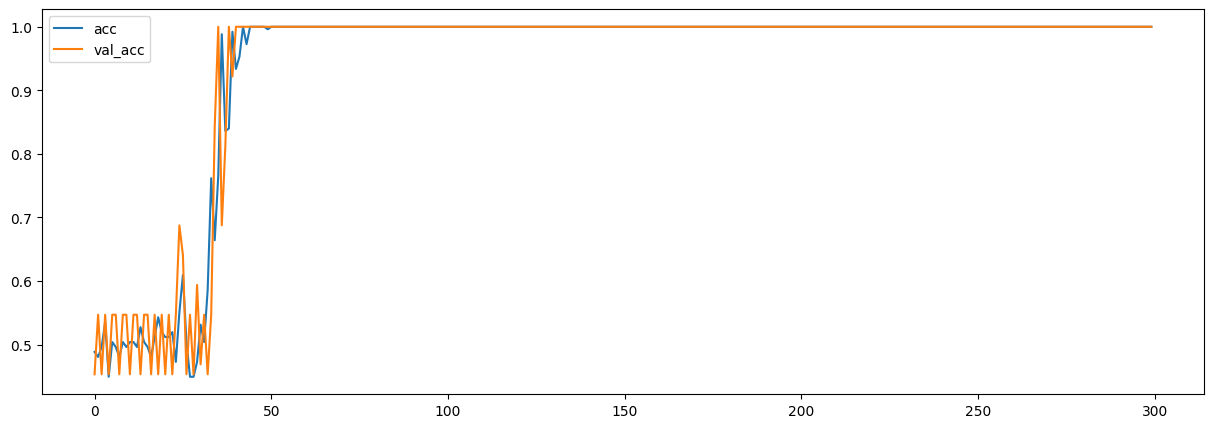

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(h.history['acc'], label='acc')
plt.plot(h.history['val_acc'], label='val_acc')

plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 11ms/step - loss: 2.1223e-18 - acc: 1.0000


[2.122268966691323e-18, 1.0]

### 왜 100퍼센트가 나올 수 있었을까? ->  학습과 검증에 사용한 데이터 자체가 고정된 각도에서 큰 변동이 없는 상태로 찍혀진 사진이었기 때문에 기계 입장에서는 쉽게 인식이되고 분류할 수 있었던 문제였음!